# Fundamentals of acoustics

[return to main page](index.ipynb)

In this example we apply the [Sound Field Synthesis Toolbox](http://sfstoolbox.org) to numercial simulate different sound fields. These simulations are assuming *free-field* conditions, i.e. the simulated loudspeakers are not located in a conventional room but in an infinitely large volume of air.

## Preparations

If it's not installed already, you can install the SFS module with:
```
python3 -m pip install sfs --user
```
Afterwards, you should re-start any running Jupyter kernels.

Once installed, we can import it into our Python session:

In [1]:
import sfs

And some other stuff:

In [2]:
# remove "inline" to get a separate plotting window:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.umath_tests import inner1d

A grid for computation and plotting:

In [3]:
grid = sfs.util.xyz_grid([-2, 2], [-2, 2], 0, spacing=0.01)

Have a look at the [documentation](http://sfs.readthedocs.org/en/latest/#sfs.util.xyz_grid) to find out what the function parameters mean.

## Physical Quantities

### Particle Velocity $\mathbf v(\mathbf x, t)$

The particle velocity $\mathbf v(\mathbf x, t)$ describes the instantaneous velocity of a particle moving in the medium. Contrary to the sound pressure, the particle velocity is a vector field.

### Sound Pressure $p(\mathbf x, t)$

The acoustic sound pressure $p(\mathbf x, t)$ is the fluaction of the static pressure inside a medium (e.g. air) and hence changes the distribution of the atoms/molecules (sound particles) in a deterministic manner. Let's plot this an illustration of this distribution.

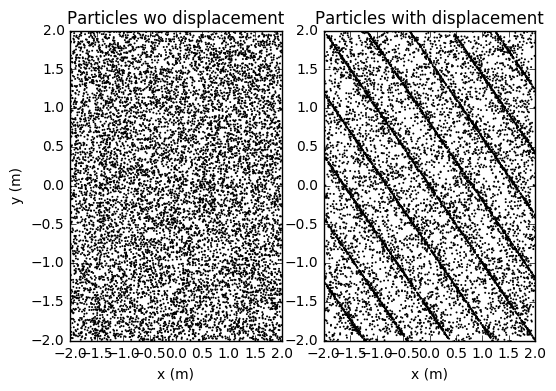

In [4]:
# create 10000 randomly distributed particles
particles = [np.random.uniform(-2, 2, 10000), np.random.uniform(-2, 2, 10000), 0];

# particles without displacement
plt.subplot(1,2,1)  # define left subplot
sfs.plot.particles(particles, facecolor='black', s=2)
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.title('Particles wo displacement')

# particles with displacement
n = [np.sqrt(2), np.sqrt(2), 0];  # direction of plane wave
f = 300;  # temporal frequency 
omega = 2*np.pi*f;  # angular frequency 
amplitude = 4e4  # unrealistically large to see an effect

v = sfs.mono.source.plane_velocity(omega, [0, 0, 0], n, particles)
particles = particles + amplitude * sfs.util.displacement(v, omega)
plt.subplot(1,2,2)  # define right subplot
sfs.plot.particles(particles, facecolor='black', s=2)
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.title('Particles with displacement')
plt.ylabel('');

## Selected Solutions of the Wave Equation (Acoustic Sources)

### Plane Wave

A plane wave

$$p_{pw}(\mathbf x, t) = \delta \left(t - \dfrac{\mathbf n_{\mathrm {pw}} \cdot \mathbf x}{c}  \right)$$

with its direction of progation defined by the vector $\mathbf n_{\mathrm {pw}}$ with $|\mathbf n_{\mathrm {pw}}| = 1$ is a solution of the homogeneous wave equation.

Let's plot a [plane wave](http://sfs.readthedocs.io/en/latest/#equation-S.pw) with a frequency of 1000 Hertz which propagates in the direction of the negative y-axis.

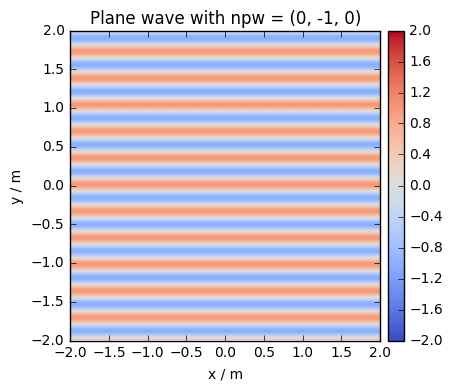

In [5]:
x0 = 0, 0, 0  # point of zero phase (meter)
npw = 0, -1, 0  # propagation vector (unit length)
f = 1000  # time-frequency (Hz)
omega = 2 * np.pi * f  # angular frequency (rad/s)

p_plane = sfs.mono.source.plane(omega, x0, npw, grid);  # compute sound pressure field
sfs.plot.soundfield(p_plane, grid);  # plotting command
plt.title('Plane wave with npw = {}'.format(npw));  # set title of plot

Now, we change the direction and frequency of the plane wave.

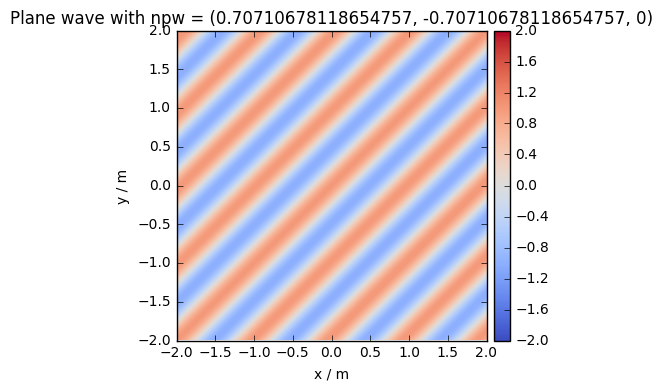

In [6]:
npw = np.sqrt(0.5), -np.sqrt(0.5), 0  # propagation vector (unit length)
f = 500 # time-frequency (Hz)
omega = 2 * np.pi * f  # angular frequency (rad/s)

# Try and change the speed of sound and see what happens
#sfs.defs.c = 2*343

p_plane = sfs.mono.source.plane(omega, x0, npw, grid);  # compute sound pressure field
sfs.plot.soundfield(p_plane, grid);  # plotting command
plt.title("Plane wave with npw = {}".format(npw));  # set title of plot

The next graph shows how the sound field changes, if we change the speed of sound. BTW, you can get (and set) the speed of sound currently used by the SFS toolbox via the variable `sfs.defs.c`.

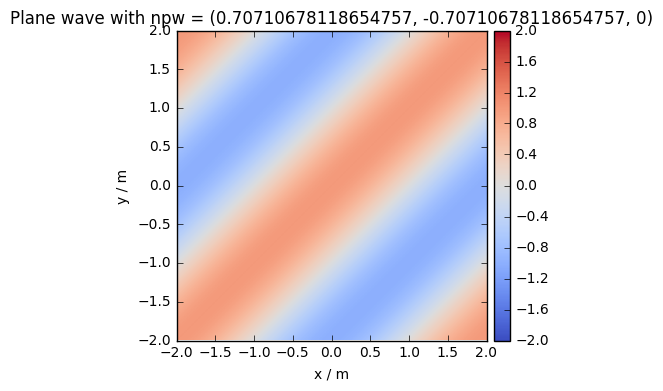

In [7]:
sfs.defs.c = 1400

p_plane = sfs.mono.source.plane(omega, x0, npw, grid);  # compute sound pressure field
sfs.plot.soundfield(p_plane, grid);  # plotting command
plt.title("Plane wave with npw = {}".format(npw));  # set title of plot

sfs.defs.c = 343

*Exercise:* How does the level of the plane wave decay over distance? Use the corresponding function to plot the level.

In [8]:
sfs.plot.level?

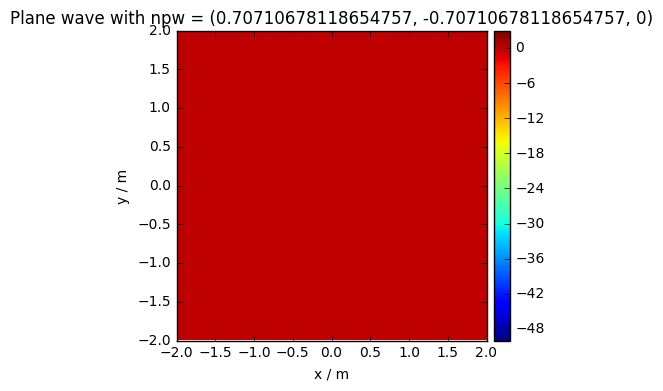

In [9]:
sfs.plot.level(p_plane, grid);  # plotting command
plt.title("Plane wave with npw = {}".format(npw));  # set title of plot

### Point Source

The density $q_{ps}(\mathbf x, t) = \delta(t)\delta(x-x_s)\delta(y-y_s)\delta(z-z_s)$ corresponds to a point source

$$p_{ps}(\mathbf x, t) = \delta \left(t - \dfrac{|\mathbf x-\mathbf x_{\mathrm s}|}{c}\right)$$

with its position defined by the vector $\mathbf x_{\mathrm {s}} = (x_s,y_s,z_s)$.

Let's plot a [point source](http://sfs.readthedocs.org/#sfs.mono.source.point) at the position $(0, 1.5, 0)$ metres with a frequency of 1000 Hertz.

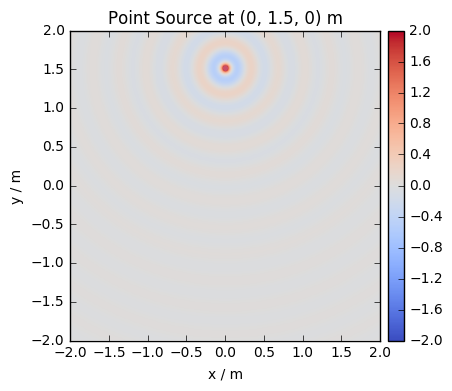

In [10]:
xs = 0, 1.5, 0  # position (meter)
f = 1000  # time-frequency (Hz)
omega = 2 * np.pi * f  # angular frequency (rad/s)

p_point = sfs.mono.source.point(omega, xs, None, grid)
sfs.plot.soundfield(p_point, grid)
plt.title("Point Source at {} m".format(xs));

The amplitude of the sound field is a bit weak, so we multiply the sound pressure field by a scaling factor of $4\pi$ to get an appropriate amplitude.

In [11]:
scaling_factor_point_source = 4 * np.pi

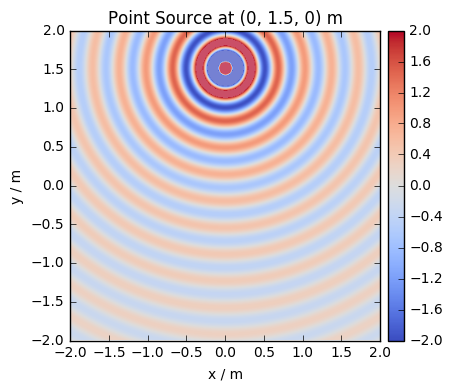

In [12]:
p_point = sfs.mono.source.point(omega, xs, None, grid)
p_point = p_point * scaling_factor_point_source
sfs.plot.soundfield(p_point, grid)
plt.title("Point Source at {} m".format(xs));

Let's try a different position and frequency.

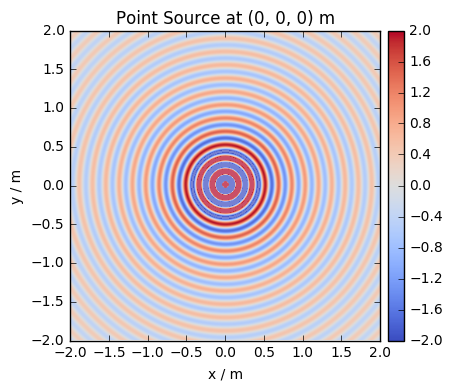

In [13]:
xs = 0, 0, 0  # position (metre)
f = 2000  # time-frequency (Hz)
omega = 2 * np.pi * f  # angular frequency (rad/s)

p_point = sfs.mono.source.point(omega, xs, None, grid)
p_point = p_point * scaling_factor_point_source
sfs.plot.soundfield(p_point, grid)
plt.title("Point Source at {} m".format(xs));

Again, we have a look at the amplitude decay, which is different from the plane wave.

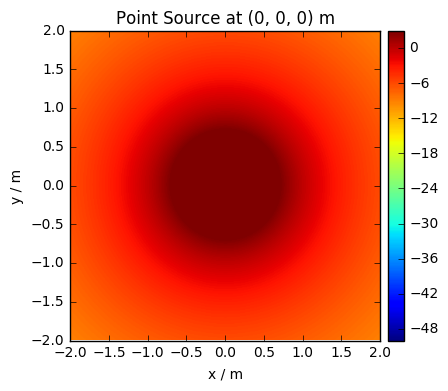

In [14]:
sfs.plot.level(p_point, grid)
plt.title("Point Source at {} m".format(xs));

### Line Source

$q_{ls}(\mathbf x, t) = \delta(t)\delta(x-x_s)\delta(y-y_s)$  corresponds to a line source parallel to the $z$-axis with its position defined by the vector $\mathbf x_{\mathrm {s}} = (x_s, y_s, 0)$. Its temporal Fourier spectrum is given as:

$$ P_{ls}(\mathbf x, \omega) = -\frac{j}{4} H_0\left(\sqrt{(x-x_s)^2 + (y-y_s)^2}\right) $$

Let's plot a [line source](http://sfs.readthedocs.org/#sfs.mono.source.line) (parallel to the z-axis) at the position $(0, 1.5)$ m with a frequency of 1000 Hz.

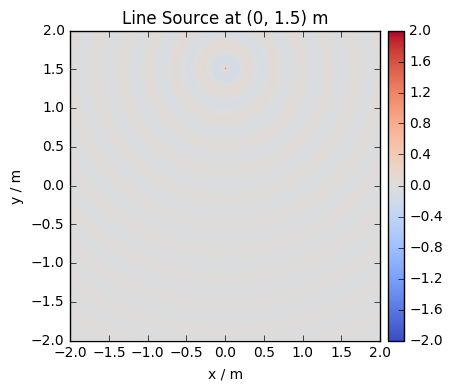

In [15]:
xs = 0, 1.5  # position (metre)
f = 1000  # time-frequency (Hz)
omega = 2 * np.pi * f  # angular frequency (rad/s)

p_line = sfs.mono.source.line(omega, xs, None, grid)
sfs.plot.soundfield(p_line, grid)
plt.title("Line Source at {} m".format(xs[:2]));

Again, the amplitude is a bit weak, let's scale it up!
This time, the scaling factor is a bit more involved:

In [16]:
scaling_factor_line_source = np.sqrt(8 * np.pi * omega / sfs.defs.c) * np.exp(1j * np.pi / 4)

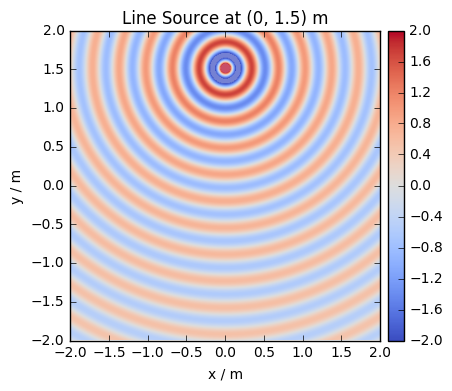

In [17]:
p_line = p_line * scaling_factor_line_source
sfs.plot.soundfield(p_line, grid)
plt.title("Line Source at {} m".format(xs[:2]));

### Dipole Source

There exist of course more complicated sources like simple point sources, one common example is a dipole source.
Have a look at the online documentation of the SFS toolbox for details on the theory behind it: http://sfstoolbox.org/en/latest/#dipole-point-source

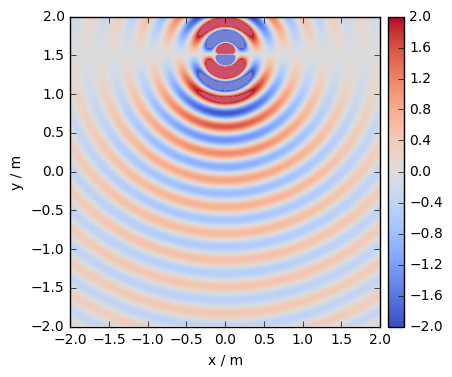

In [18]:
xs = 0, 1.5, 0
ns = 0, 1, 0
f = 1000  # time-frequency (Hz)
omega = 2 * np.pi * f  # angular frequency (rad/s)

p_dipole = sfs.mono.source.point_dipole(omega, xs, ns, grid)
sfs.plot.soundfield(p_dipole, grid);

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>